# 중간고사

- 허용 : 온라인 검색, 프린트 자료 참고
- 금지 : 타인(외부인 포함)과 대화, 통신 
- 시험시간 : 18:30 ~ 20:00
- 제출방법 : "08-중간고사" 과제에 08-Midterm.ipynb 파일 제출


## 1. 데이터에 대한 분석 방법이 적절치 않은 것을 모두 고르시오 (1, 3, 5)   <- 괄호안에 쓸 것

#### ( 정답의 갯수는 0~5개 사이, 오답이 포함되면 감점, 예) 2개 썼는데 하나 맞고 하나 틀리면 0점 )

1. 성별에 따른 계절학기 수강 차이 분석 - 상관분석
2. 군 휴학 전 후의 평점 비교 - 평균비교
3. 강좌 별 수강신청 마감 소요 시간 분석 - 회귀분석 
4. 공부시간과 성적의 관계 - 상관분석
5. 연봉과 평점 관계 분석 - 평균비교

## 2. 이상치, 결측치, 오류값 등에 관한 설명 중 틀린 것을 모두 고르시오  ( 1 ) <- 괄호안에 쓸 것

#### ( 정답의 갯수는 0~5개 사이, 오답이 포함되면 감점, 예) 2개 썼는데 하나 맞고 하나 틀리면 0점 )

1. 통계적 outlier 정의는 상하위 0.1%의 값을 말함
2. 연매출액이 800조원인 국내 기업 데이터는 오류값 임
3. 졸업 평점 4.5인 학생의 성적은 특이값임
4. nominal 데이터는 pd.Categorical() 을 통해 오류값을 제거할 수 있음
5. NA값이 있어도 단일 변수 통계는 산출 가능함


## 실습 문제

- 08.zip 안에 주어진 file을 이용하여 
- 특별한 지시가 없으면 답만 맞으면 됨 (warning은 괜찮음)
- 실행 결과를 포함하여 제출함
- 답안 작성에 문제 당 한 개 이상의 코드 블록을 써도 됨
- 3번부터 순서대로 실행시 개별 문제의 답이 실행 되어야 함 (필요한 라이브러리 등을 위쪽에서 import해야 함. 개별 문제 별로 중복 import할 필요 없음, 최종 제출 전 실행결과를 지우고 순서대로 실행해 볼 것)


In [99]:
# 문제

import pandas as pd

dataset = pd.read_csv('bridges.data', names=['ID','River','Location_Idx', 'Built_Year', 'Purpose', 'Length',
                                             'Lanes', 'Clear_Ground', 'TorD', 'Material', 'Span', 'Rel_length', 'Type'])


## 3. Type이 'WOOD' 또는 'SUSPEN' 인 다리의 Purpose, Lane 컬럼을 출력하시오


In [100]:
#import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
#3번 답안
wood_p = dataset[(dataset.Type=='WOOD')].Purpose
wood_l = dataset[(dataset.Type=='WOOD')].Lanes

print("WOOD 타입의 purpose")
print(wood_p)

print("WOOD 타입의 Lanes")
print(wood_l)

suspen_p = dataset[(dataset.Type=='SUSPEN')].Purpose
suspen_l = dataset[(dataset.Type=='SUSPEN')].Lanes

print("SUSPEN 타입의 purpose")
print(suspen_p)

print("SUSPEN 타입의 Lane")
print(suspen_l)

WOOD 타입의 purpose
0      HIGHWAY
1      HIGHWAY
2     AQUEDUCT
3      HIGHWAY
4      HIGHWAY
5      HIGHWAY
8     AQUEDUCT
9      HIGHWAY
10          RR
11     HIGHWAY
12     HIGHWAY
13          RR
17     HIGHWAY
18     HIGHWAY
21     HIGHWAY
38    AQUEDUCT
Name: Purpose, dtype: object
WOOD 타입의 Lanes
0     2
1     2
2     1
3     2
4     2
5     2
8     1
9     2
10    2
11    2
12    2
13    2
17    2
18    2
21    4
38    1
Name: Lanes, dtype: object
SUSPEN 타입의 purpose
6     AQUEDUCT
7      HIGHWAY
14     HIGHWAY
20     HIGHWAY
27     HIGHWAY
42     HIGHWAY
69        WALK
72     HIGHWAY
73     HIGHWAY
80     HIGHWAY
84     HIGHWAY
Name: Purpose, dtype: object
SUSPEN 타입의 Lane
6     1
7     2
14    2
20    ?
27    2
42    2
69    ?
72    4
73    4
80    4
84    4
Name: Lanes, dtype: object


## 4. River의 분포를 파이 차트로 그리시오.

<AxesSubplot:ylabel='River'>

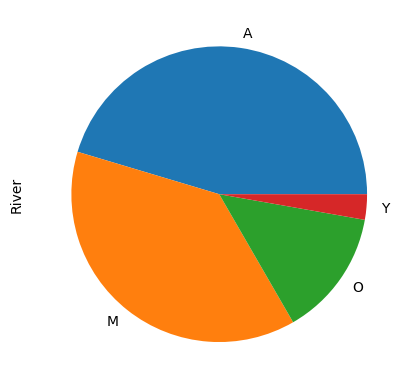

In [102]:
# 답:
dataset['River'].value_counts().plot(kind='pie')

## 5.  Lanes 의  평균 값을 구하시오
(Lanes 값이 유효한 모든 레코드에 대해서 구하시오)

In [103]:
#답 :
dataset.Lanes = dataset.Lanes.replace('?', np.NaN)
dataset = dataset.dropna(subset=['Lanes'])

dataset['Lanes'] = dataset['Lanes'].astype('float')

counts = len(dataset['Lanes'])
laneSum = dataset.sum().Lanes

print(laneSum/counts)

2.630434782608696


## 6. Type 별로  Length 가 다른지 분석하고, 분석 결과를 통계적으로  설명하시오. 
( Type과 Length가 모두 유효한 값을 갖는 81개의 레코드에 대해 분석해야 함)

In [104]:
dataset.Type = dataset.Type.replace('?', np.NaN)
dataset = dataset.dropna(subset=['Type'])

dataset.Length = dataset.Length.replace('?', np.NaN)
dataset = dataset.dropna(subset=['Length'])
dataset['Length'] = dataset['Length'].astype('float')

from scipy.stats import levene, ttest_ind, ttest_rel
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

dataset.Type.unique() #독립변수의 종류 확인

model = ols('Length~Type', data=dataset).fit()
print(anova_lm(model))

            df        sum_sq       mean_sq         F    PR(>F)
Type       5.0  6.181937e+06  1.236387e+06  2.239885  0.060497
Residual  66.0  3.643114e+07  5.519869e+05       NaN       NaN


#### 설명 :
Type은 nominal 데이터이고, Length는 numeric 데이터이므로 평균비교를 사용하였습니다.

그리고 독립변수로 주어진 Type의 종류가 3가지 이상이므로 anova를 사용하였습니다.

결과를 확인해보면 PR이 0.05보다 크기 때문에, 유의미한 차이가 있지 않습니다.

## 7. Span과 Type을 각기 적절한 방법으로 encoding 하시오. 전체 데이터를 바꾸지 않고 해당 컬럼에 대한 각각의 encoding결과만 출력되면 됨

In [105]:
#답: 
#print(dataset.head())
#Span은 ordered nominal 이므로 label encoding을 한다.
#Type은 pure nominal 이므로 one-hot encoding을 한다.

#Type 은 위에서 결측치 처리 완료, Span은 결측치 처리를 안했으므로 진행한다
dataset.Span = dataset.Span.replace('?', np.NaN)
dataset = dataset.dropna(subset=['Span'])

#Span encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
span_result = le.fit_transform(dataset['Span'])
dataset['Span'] = span_result

#Type encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
type_ohe = ohe.fit_transform(dataset[['Type']])
type_df = pd.DataFrame(type_ohe, columns = dataset.Type.unique())

dataset = pd.concat([dataset.drop(columns=['Type']), type_df], axis=1)
dataset

,ID,River,Location_Idx,Built_Year,Purpose,Length,Lanes,Clear_Ground,TorD,Material,Span,Rel_length,WOOD,SUSPEN,SIMPLE-T,ARCH,CANTILEV,CONT-T
1,E2,A,25,1819.0,HIGHWAY,1037.0,2.0,N,THROUGH,WOOD,2.0,S,0.0,0.0,0.0,0.0,0.0,1.0
3,E5,A,29,1837.0,HIGHWAY,1000.0,2.0,N,THROUGH,WOOD,2.0,S,0.0,0.0,0.0,0.0,1.0,0.0
5,E7,A,27,1840.0,HIGHWAY,990.0,2.0,N,THROUGH,WOOD,1.0,S,0.0,0.0,0.0,0.0,0.0,1.0
6,E8,A,28,1844.0,AQUEDUCT,1000.0,1.0,N,THROUGH,IRON,2.0,S,0.0,0.0,0.0,0.0,0.0,1.0
7,E9,M,3,1846.0,HIGHWAY,1500.0,2.0,N,THROUGH,IRON,2.0,S,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0


## 8. Built_Year로 Length를 예측하는 linear regression model을 만드시오. 50% 의 데이터로 학습한 다음, 50%의 데이터로 테스트 ( 데이터 분할시 random seed로 1을 사용)  후 mse를 구하시오 

In [106]:
#답: 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy import array

dataset.columns = [c.replace(' ', '_') for c in dataset.columns]
dataset.Built_Year = dataset.Built_Year.replace('?', np.NaN)
dataset = dataset.dropna(subset=['Built_Year'])

X=array(dataset.Built_Year)
X=X.reshape(-1,1)
Y=array(dataset.Length)
Y=Y.reshape(-1,1)

X_train, X_tv, Y_train, Y_tv = train_test_split(X, Y, test_size=0.5, random_state=1)
X_test, X_validation, Y_test, Y_validation = train_test_split(X_tv, Y_tv, test_size=0.5, random_state=1)

lr8 = LinearRegression()
lr8.fit(X_test, Y_test)
Y_predict = lr8.predict(X_test)

mse = mean_squared_error(Y_test, Y_predict)
print('mse: {0:.3f}'. format(mse))

mse: 270170.103


## 9. auto-mpg.csv 파일 레코드 중 70%를 이용해서 실린더 수를 "분류"하는 svm 모델을 만들고 ( car_name, origin 필드는 사용하지 않음) 나머지 30%의 test data로 test하여 예측 성능 (accuracy)을 분석하시오 

In [107]:
#답:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

mpg_df = pd.read_csv('auto-mpg.csv', header=0, engine='python')
mpg_df = mpg_df.drop(['car_name', 'origin'], axis = 1, inplace=False)

for c in mpg_df.columns:
    mpg_df[c] = mpg_df[c].replace('?', np.NaN)

mpg_df = mpg_df.dropna()

scaler = StandardScaler()
mpg_df_scaled = scaler.fit_transform(mpg_df)

Y=mpg_df.cylinders
X=mpg_df_scaled

X_train, X_tv, Y_train, Y_tv = train_test_split(X, Y, test_size=0.7, random_state=1)
X_test, X_validation, Y_test, Y_validation = train_test_split(X_tv, Y_tv, test_size=0.3, random_state=1)

model9 = svm.SVC()
model9.fit(X_test, Y_test)
Y_predict = model9.predict(X_test)

accuracy=accuracy_score(Y_test, Y_predict)
print('정확도: {0:.3f}'.format(accuracy))

정확도: 0.979


## 10.  9번의 데이터를 2 차원으로 축소(PCA)하여 결과를 비교하시오

In [108]:
#답:
mpg_df2 = pd.read_csv('auto-mpg.csv', header=0, engine='python')
mpg_df2 = mpg_df.drop(['car_name', 'origin'], axis = 1, inplace=False)

for c in mpg_df.columns:
    mpg_df2[c] = mpg_df[c].replace('?', np.NaN)

mpg_df2 = mpg_df2.dropna()

Y=mpg_df2.cylinders
X=mpg_df2_scaled

pca = decomposition.PCA(n_components=3)
pca.fit(X)
X=pca.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

model=svm.SVC()
model.fit(X_train, Y_train)

accuracy2=accuracy_score(Y_test, Y_predict)

print('정확도: {0:.3f}'.format(accuracy))
print('축소한 정확도: {0:.3f}'.format(accuracy2))

KeyError: "['car_name', 'origin'] not found in axis"